In [108]:
#On commence par définir les fonctions qui seront utiles

import numpy as np
import os
from scipy.optimize import minimize
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import random
from mpl_toolkits import mplot3d

def dist(u,v,x):
    y=((x-v)-u*(x-v).dot(u))
    return y.dot(y)

X=np.arange(100).reshape((2,50))
    
def f(U):
    tot=0
    for x in X:
        tot+=min(dist(U[0],U[1],x), dist(U[2],U[3],x))
    return tot

def grad(f,U,eps):
    dim=U.shape()
    grad=np.zeros((dim[0],dim[1]))
    for i in range(dim[0]):
        for j in range(dim[1]):
            U_1=U
            U_1[i,j]=U_1[i,j]+eps
            grad[i,j]=(f(U_1)-f(U))/eps
    return grad

def armijo(f,U,eps):
    alpha=1
    G=grad(f,U,eps)
    while f(U-alpha*G)>-alpha*G.dot(G)/2:
        alpha/=2
    return U-alpha*G

def proj(U):
    U[0]=U[0]/(U[0].dot(U[0]))
    U[2]=U[2]/(U[2].dot(U[2]))
    
def uzawa(f,U_0,eps):
    #On pose une condition d'arrêt
    U_1=proj(armijo(f,U_0,eps))
    while f(U_1)-f(U_1)>100*eps:
        U_0, U_1 = U_1, proj(armijo(f,U_0,eps))
    return U_1


def intersect(X,Y):
    #renvoie l'intersection de deux list triée par ordre croissant
    n=len(X)
    m=len(Y)
    a=0
    b=0
    l=[]
    while a<n and b<m:
        if X[a]==Y[b]:
            l.append(X[a])
            a+=1
            b+=1
        else:
            if X[a]>Y[b]:
                b+=1
            else:
                a+=1
    return np.array(l)

In [5]:
os.getcwd()

'/home/mathis/stage/R_codes/series'

In [8]:
Dates=pd.read_csv("dates_1979_2014.csv", index_col=0).to_numpy()
dates=np.where(Dates[:,0]>=1996)[0]

etp_dsI=pd.read_csv("etp_dsI.csv", index_col=0).to_numpy()
n=len(etp_dsI)

In [12]:
ETP_series=np.zeros((n,11))
pr_series=np.zeros((n,11))
prr_series=np.zeros((n,11))
deb_series=np.zeros((n,11))
etr_series=np.zeros((n,11))


#On ouvre les fichiers de 
#simulations_ref=pd.read_csv('simu_ref.csv', index_col=0).to_numpy()[:,np.array([0,1,2,17])]
#simulations_ds1=pd.read_csv('simu_ds1.csv', index_col=0).to_numpy()[:,np.array([0,1,2,17])]
#simulations_ds2=pd.read_csv('simu_ds2.csv', index_col=0).to_numpy()[:,np.array([1,2,3,18])]
#simulations_ds3=pd.read_csv('simu_ds3.csv', index_col=0).to_numpy()[:,np.array([1,2,3,18])]
#simulations_ds4=pd.read_csv('simu_ds4.csv', index_col=0).to_numpy()[:,np.array([1,2,3,18])]
#simulations_dsI=pd.read_csv('simu_dsI.csv', index_col=0).to_numpy()[:,np.array([1,2,3,18])]

In [40]:
times=np.zeros((n,11))
times[:,0]= np.where(pd.read_csv('simu_ref.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,1]= np.where( pd.read_csv('simu_ds1.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,2]= np.where( pd.read_csv('simu_ds2.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,3]= np.where( pd.read_csv('simu_ds3.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,4]= np.where( pd.read_csv('simu_ds4.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,5]= np.where( pd.read_csv('simu_dsI.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,6]= np.where( pd.read_csv('simu_deg1.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,7]= np.where( pd.read_csv('simu_deg2.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,8]= np.where( pd.read_csv('simu_deg3.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,9]= np.where( pd.read_csv('simu_deg4.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]
times[:,10]= np.where( pd.read_csv('simu_IPSL.csv', index_col=0).to_numpy()[:,0]%86400 ==0)[0]

times=times.astype(int)

In [57]:
for i in range(6):
    if i==0:
        ETP_series[:,i]=pd.read_csv('etp_ref.csv', index_col=0).to_numpy()[:,0]
        pr_series[:,i]=pd.read_csv('pr_ref.csv', index_col=0).to_numpy()[:,0]
        deb_series[:,i]=-pd.read_csv('simu_ref.csv', index_col=0).to_numpy()[times[:,0],1]
        prr_series[:,i]=pd.read_csv('simu_ref.csv', index_col=0).to_numpy()[times[:,0],2]
        etr_series[:,i]=pd.read_csv('simu_ref.csv', index_col=0).to_numpy()[times[:,0],17]
    if i<5 and i>0:
        ETP_series[:,i]=pd.read_csv('etp_ds'+str(i)+'.csv', index_col=0).to_numpy()[:,0]
        pr_series[:,i]=pd.read_csv('pr_ds'+str(i)+'.csv', index_col=0).to_numpy()[:,0]
        deb_series[:,i]=-pd.read_csv('simu_ds'+str(i)+'.csv', index_col=0).to_numpy()[times[:,i],1]
        prr_series[:,i]=pd.read_csv('simu_ds'+str(i)+'.csv', index_col=0).to_numpy()[times[:,i],2]
        etr_series[:,i]=pd.read_csv('simu_ds'+str(i)+'.csv', index_col=0).to_numpy()[times[:,i],17]
        
        ETP_series[:,i+5]=pd.read_csv('etp_deg'+str(i)+'.csv', index_col=0).to_numpy()[:,0]
        pr_series[:,i+5]=pd.read_csv('pr_deg'+str(i)+'.csv', index_col=0).to_numpy()[:,0]
        deb_series[:,i+5]=-pd.read_csv('simu_deg'+str(i)+'.csv', index_col=0).to_numpy()[times[:,i],1]
        prr_series[:,i+5]=pd.read_csv('simu_deg'+str(i)+'.csv', index_col=0).to_numpy()[times[:,i],2]
        etr_series[:,i+5]=pd.read_csv('simu_deg'+str(i)+'.csv', index_col=0).to_numpy()[times[:,i],17]
    if i==5:
        ETP_series[:,i]=pd.read_csv('etp_dsI.csv', index_col=0).to_numpy()[:,0]
        pr_series[:,i]=pd.read_csv('pr_dsI.csv', index_col=0).to_numpy()[:,0]
        deb_series[:,i]=-pd.read_csv('simu_dsI.csv', index_col=0).to_numpy()[times[:,i],1]
        prr_series[:,i]=pd.read_csv('simu_dsI.csv', index_col=0).to_numpy()[times[:,0],2]
        etr_series[:,i]=pd.read_csv('simu_dsI.csv', index_col=0).to_numpy()[times[:,i],17]
        
        ETP_series[:,i+5]=pd.read_csv('etp_IPSL.csv', index_col=0).to_numpy()[:,0]
        pr_series[:,i+5]=pd.read_csv('pr_IPSL.csv', index_col=0).to_numpy()[:,0]
        deb_series[:,i+5]=-pd.read_csv('simu_IPSL.csv', index_col=0).to_numpy()[times[:,i],1]
        prr_series[:,i+5]=pd.read_csv('simu_IPSL.csv', index_col=0).to_numpy()[times[:,i],2]
        etr_series[:,i+5]=pd.read_csv('simu_IPSL.csv', index_col=0).to_numpy()[times[:,i],17]

## Analyse des séries des précipitations et des débits

Ilfaudra faire attention à bien avoir les données dans le même 

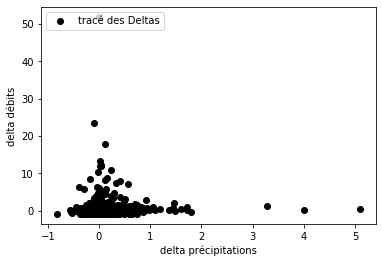

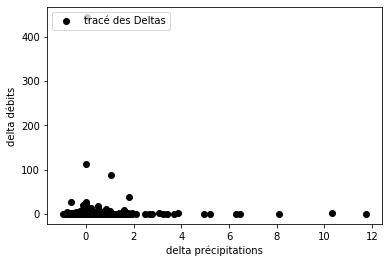

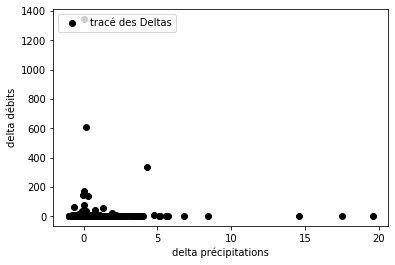

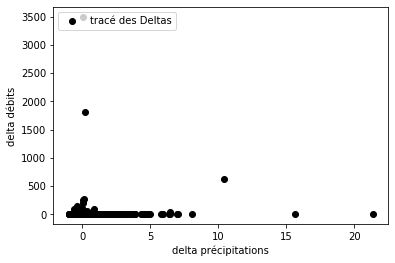

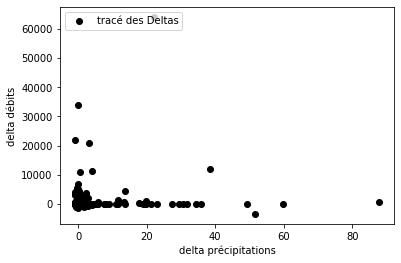

In [109]:
points_pr=np.where(pr_series[:,0]>0)[0]
points_prr=np.where(prr_series[:,0]>0)[0]
points_deb=np.where(deb_series[:,0]>0)[0]
points=intersect(points_pr,intersect(points_prr,points_deb))
#points=intersect(points_pr, points_deb)
points=points.astype(int)

for i in range (1,6):
    delta_pr=(pr_series[points,i]-pr_series[points,0])/pr_series[points,0]
    delta_prr=(prr_series[points,i]-prr_series[points,0])/prr_series[points,0]
    delta_deb=(deb_series[points,i]-deb_series[points,0])/deb_series[points,0]
    plt.scatter(delta_deb, delta_pr, color="black", label="tracé des Deltas")
    plt.xlabel("delta précipitations")
    plt.ylabel("delta débits")
    plt.legend(loc='upper left')
    plt.show()

In [88]:
intersect(points_pr,points_deb)

IndexError: index 4497 is out of bounds for axis 0 with size 4497

In [100]:
len(points_pr)
len(points_deb)

6508

In [103]:
points_pr[4496]
points_deb[6507]

6525

In [107]:
intersect(points_pr,points_deb)

array([   0,    1,    3, ..., 6516, 6523, 6524])